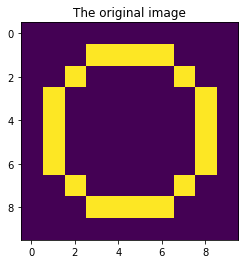

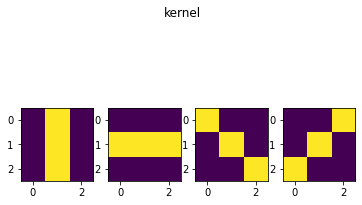

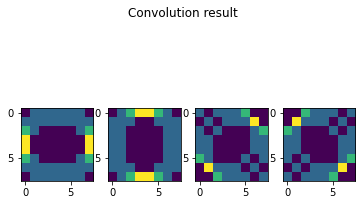

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# 간단한 합성곱층 정의


class Conv:
    def __init__(self, W):
        self.W = W

    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                out[i, j] = np.dot(self.W.flatten(), x.flatten())
        return out


local_filename, headers = urllib.request.urlretrieve(
    'https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

W1 = np.array([[0, 1, 0],
               [0, 1, 0],
               [0, 1, 0]])
W2 = np.array([[0, 0, 0],
               [1, 1, 1],
               [0, 0, 0]])
W3 = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 1]])
W4 = np.array([[0, 0, 1],
               [0, 1, 0],
               [1, 0, 0]])

plt.subplot(1, 4, 1)
plt.imshow(W1)
plt.subplot(1, 4, 2)
plt.imshow(W2)
plt.subplot(1, 4, 3)
plt.imshow(W3)
plt.subplot(1, 4, 4)
plt.imshow(W4)
plt.suptitle("kernel", fontsize=12)
plt.show()

conv1 = Conv(W1)
C1 = conv1.f_prop(X)
conv2 = Conv(W2)
C2 = conv2.f_prop(X)
conv3 = Conv(W3)
C3 = conv3.f_prop(X)
conv4 = Conv(W4)
C4 = conv4.f_prop(X)

plt.subplot(1, 4, 1)
plt.imshow(C1)
plt.subplot(1, 4, 2)
plt.imshow(C2)
plt.subplot(1, 4, 3)
plt.imshow(C3)
plt.subplot(1, 4, 4)
plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

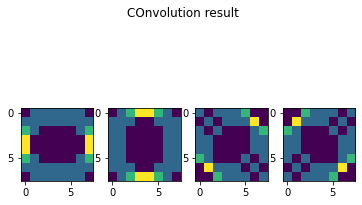

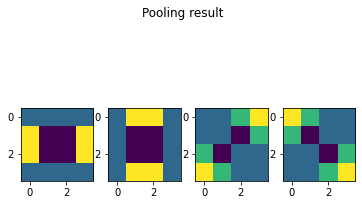

In [2]:
# 간단한 풀링층 정의
class Pool:
    def __init__(self, l):
        self.l = l
    
    def f_prop(self, X):
        l = self.l
        out = np.zeros((X.shape[0]//self.l, X.shape[1]//self.l))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i, j] = np.max(X[i*l:(i+1)*l, j*l:(j+1)*l])
        return out

conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)

plt.subplot(1, 4, 1); plt.imshow(C1)
plt.subplot(1, 4, 2); plt.imshow(C2)
plt.subplot(1, 4, 3); plt.imshow(C3)
plt.subplot(1, 4, 4); plt.imshow(C4)
plt.suptitle("COnvolution result", fontsize=12)
plt.show()

pool = Pool(2)
P1 = pool.f_prop(C1)
P2 = pool.f_prop(C2)
P3 = pool.f_prop(C3)
P4 = pool.f_prop(C4)

plt.subplot(1, 4, 1); plt.imshow(P1)
plt.subplot(1, 4, 2); plt.imshow(P2)
plt.subplot(1, 4, 3); plt.imshow(P3)
plt.subplot(1, 4, 4); plt.imshow(P4)
plt.suptitle("Pooling result", fontsize=12)
plt.show()

In [3]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Conv2D(input_shape=(28, 28, 1),
                 filters=32,
                 kernel_size=(2, 2),
                 strides=(1, 1),
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(1, 1)))
model.add(Conv2D(filters=32,
                 kernel_size=(2, 2),
                 strides=(1, 1),
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 256)               5

4/4 [==============================] - 0s 6ms/step - loss: 2.5166 - accuracy: 0.0600
Test loss: 2.5166420936584473
Test accuracy: 0.05999999865889549


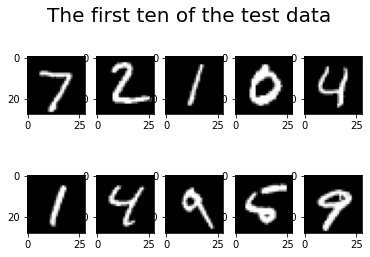

1/1 [==============================] - 0s 91ms/step
[6 6 6 6 6 6 6 6 8 6]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                

In [4]:
from keras.datasets import mnist
from keras.utils.vis_utils import plot_model
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train[:300].reshape(-1, 28, 28, 1)
X_test = X_test[:100].reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {scores[0]}")
print(f"Test accuracy: {scores[1]}")

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), "gray")
plt.suptitle("The first ten of the test data", fontsize=20)
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

model.summary()

In [24]:
import keras
from keras.datasets import cifar10
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:300]
X_test = X_test[:100]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

c:\Users\Kang MinJae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
import tensorflow as tf

# CPU 학습
print("CPU를 사용한 학습")
with tf.device("/device:CPU:0"):
    model.fit(X_train, y_train, batch_size=32, epochs=2)

print("GPU를 사용한 학습")
with tf.device("/device:GPU:0"):
    model.fit(X_train, y_train, batch_size=32, epochs=2)

CPU를 사용한 학습
Epoch 1/2
10/10 [==============================] - 0s 40ms/step - loss: 1.9193 - accuracy: 0.3233
Epoch 2/2
10/10 [==============================] - 0s 46ms/step - loss: 1.9024 - accuracy: 0.3467
GPU를 사용한 학습
Epoch 1/2
10/10 [==============================] - 0s 10ms/step - loss: 1.9356 - accuracy: 0.2900
Epoch 2/2
10/10 [==============================] - 0s 10ms/step - loss: 1.9192 - accuracy: 0.3333


4/4 [==============================] - 0s 71ms/step - loss: 1.9202 - accuracy: 0.3000
Test Loss: 1.9201644659042358
Test Accuracy: 0.30000001192092896


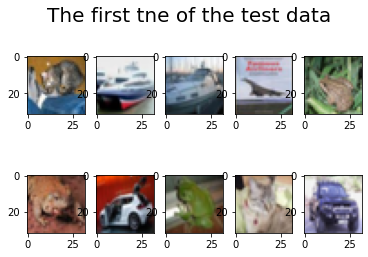

1/1 [==============================] - 0s 120ms/step
[2 8 1 1 4 6 3 6 2 1]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_19 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_20 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 3

In [25]:
# 가중치 저장
model.save_weights("param_cifar10.hdf5")

scores = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first tne of the test data", fontsize=20)
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

model.summary()

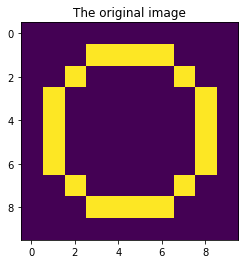

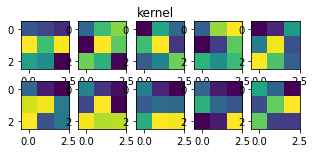

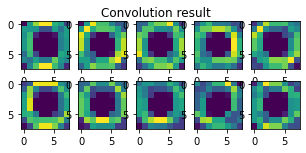

In [31]:
# 하이퍼파라미터 filters(합성곱층)

import urllib.request

# 간단한 합성곱층 정의
# 1채널 이미지의 합성곱만 상정, 커널 3x3 고정
class Conv:
    def __init__(self, filters):
        self.filters = filters
        self.W = np.random.rand(filters, 3, 3)

    def f_prop(self, X):
        out = np.zeros((filters, X.shape[0]-2, X.shape[1]-2))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[1].shape[1]):
                    x = X[i:i+3, j:j+3]
                    out[k, i, j] = np.dot(self.W[k].flatten(), x.flatten())
        return out


local_filename, headers = urllib.request.urlretrieve(
    'https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')

X = np.load(local_filename)
filters = 10

conv = Conv(filters=filters)

# 합성곱 층 생성
C = conv.f_prop(X)

# 시각화
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters//2,i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(conv.W[i])
plt.suptitle('kernel', fontsize=12)
plt.show()

plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2, filters//2, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", 
                   left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()